<a href="https://colab.research.google.com/github/Asiii99/MySelf/blob/main/mainproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/e_commerce.csv')  # Adjust the file path if needed



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5000 non-null   float64
 1   State_Code           5000 non-null   object 
 2   Customer_Name        5000 non-null   object 
 3   Order_Date           5000 non-null   object 
 4   Status               5000 non-null   object 
 5   Product              5000 non-null   object 
 6   Category             5000 non-null   object 
 7   Brand                5000 non-null   object 
 8   Cost                 5000 non-null   float64
 9   Sales                5000 non-null   float64
 10  Quantity             5000 non-null   float64
 11  Total_Cost           5000 non-null   float64
 12  Total_Sales          5000 non-null   float64
 13  Assigned Supervisor  5000 non-null   object 
dtypes: float64(6), object(8)
memory usage: 547.0+ KB


In [3]:
df.shape[0]

5000

In [4]:
df.head()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


In [5]:

# Remove the specified columns
df = df.drop(['Order_Number', 'Order_Date'], axis=1)

df.shape[0]


5000

In [6]:
df.isna().sum()

,0
State_Code,0
Customer_Name,0
Status,0
Product,0
Category,0
Brand,0
Cost,0
Sales,0
Quantity,0
Total_Cost,0


In [7]:
df['Status'].unique()

array(['Delivered', 'Order', 'Processing', 'Shipped'], dtype=object)

In [8]:
df.head()

,State_Code,Customer_Name,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,AP,Adhir Samal,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,AP,Dannana Jhammi,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,AS,Vipin Kumar,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,BR,Ranjeet Kumar,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,CG,Sajal Singhal,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


In [9]:
df.shape[0]

5000

In [10]:
df['Status'].value_counts()

,count
Status,
Processing,1254
Order,1252
Shipped,1250
Delivered,1244


In [11]:
df['Status'].unique()

array(['Delivered', 'Order', 'Processing', 'Shipped'], dtype=object)

In [12]:
!pip install imblearn

In [13]:
pip install xgboost


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Target Variable Encoding
df['Status'] = df['Status'].astype('category').cat.codes  # Converts the status to numeric codes

# Feature Selection
X = df[['Cost', 'Sales', 'Quantity', 'Total_Cost', 'Total_Sales']]
y = df['Status']

# Encoding Categorical Variables
X = pd.concat([X, pd.get_dummies(df[['State_Code', 'Product', 'Category', 'Brand', 'Assigned Supervisor']], drop_first=True)], axis=1)

# Using Stratified K-Folds Cross-Validation with fewer splits
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-Validation Scores
cv_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

# Train the model using all data
rf_classifier.fit(X, y)

# Predictions on the whole dataset
y_pred = rf_classifier.predict(X)

# Model Evaluation
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
print(f"Overall Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Cross-Validation Accuracy: 0.42 ± 0.00
Overall Accuracy: 0.94
Confusion Matrix:
[[1146   98    0    0]
 [  83 1168    0    1]
 [   0    0 1202   52]
 [   1    0   56 1193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1244
           1       0.92      0.93      0.93      1252
           2       0.96      0.96      0.96      1254
           3       0.96      0.95      0.96      1250

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [15]:
df.shape

(5000, 12)

In [16]:


import pickle

# Save the trained model to a file
filename = 'trained_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

# You can later load the model using:
# loaded_model = pickle.load(open(filename, 'rb'))

In [17]:


# Save the trained model to a file
filename = 'trained_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

# You can later load the model using:
# loaded_model = pickle.load(open(filename, 'rb'))

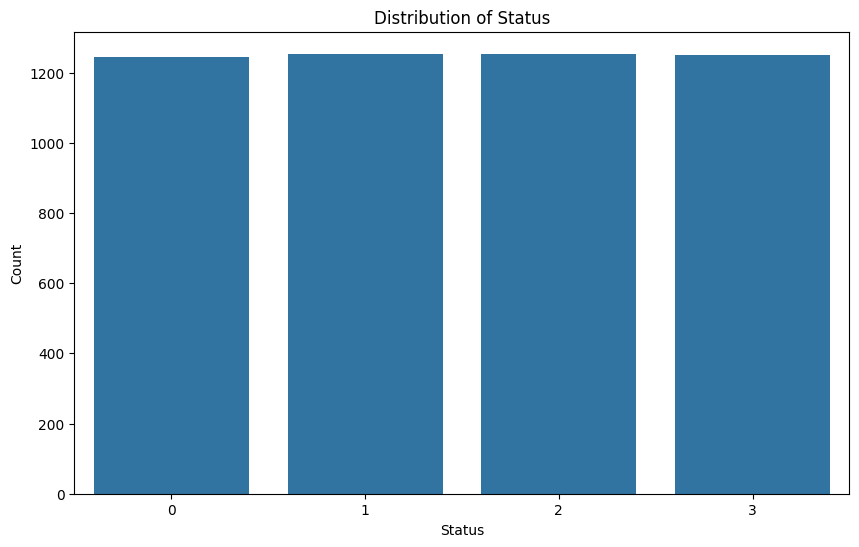

In [18]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Status' is the column you want to visualize
status_counts = df['Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()



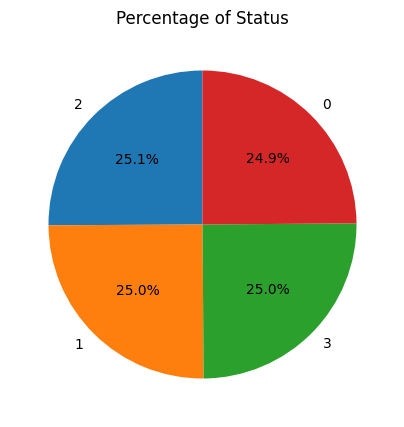

In [19]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Status')
plt.show()

In [20]:
df.shape

(5000, 12)

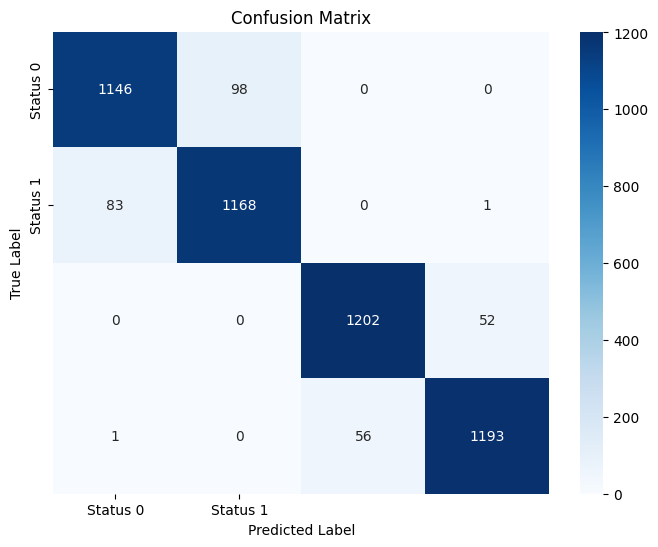

In [21]:
# prompt: confusion matrix visualization

import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...


# Assuming 'y' contains your true labels and 'y_pred' contains your predicted labels

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Status 0', 'Status 1'],  # Replace with your actual class labels
            yticklabels=['Status 0', 'Status 1'])  # Replace with your actual class labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()